#Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Getting the training data

In [24]:
dfx=pd.read_csv('/content/Linear_X_Train.csv')
dfy=pd.read_csv('/content/Linear_Y_Train.csv')
dftest=pd.read_csv('/content/Linear_X_Test.csv')
x=dfx.values
y=dfy.values
dftest=dftest.values
x=x.reshape((-1,))
y=y.reshape((-1,))
test_data_array=dftest.reshape((-1,))
print(x.shape)
print(y.shape)
print(test_data_array.shape)

(3750,)
(3750,)
(1250,)


# Visualising and Preprocessing

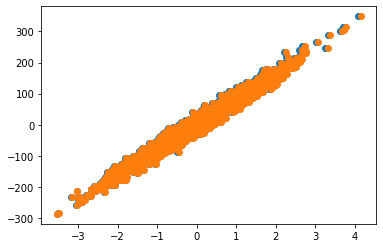

In [25]:
plt.scatter(x,y)
X = (x-x.mean())/x.std()
Y = y
plt.scatter(X,Y)
plt.show()

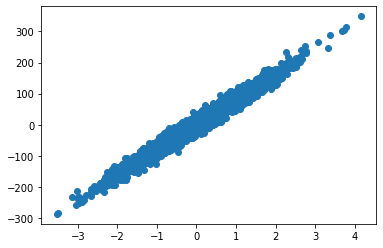

In [26]:
plt.scatter(X,Y)
plt.show()

# Gradient Descent Algorithm

In [0]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

In [0]:
def error(X,Y,theta):
    
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error


In [0]:
def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad

In [0]:
#Algorithm
def gradientDescent(X,Y,learning_rate=0.00001):
    
    theta = np.array([-300.0,0.0])
    
    itr = 0
    max_itr = 300
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        
        itr += 1
        
    
    return theta,error_list,theta_list

In [0]:
final_theta, error_list,theta_list = gradientDescent(X,Y)

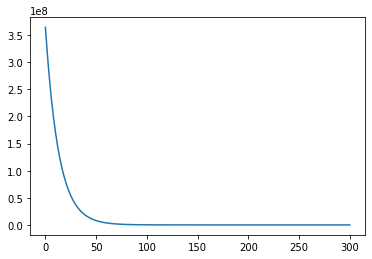

In [43]:
plt.plot(error_list)
plt.show()

In [44]:
print(final_theta)

[ 0.68083695 79.90493119]


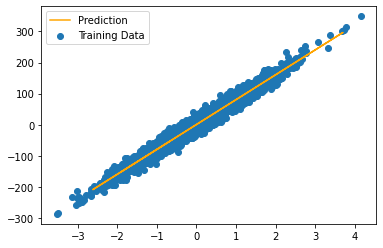

In [45]:
plt.scatter(X,Y,label='Training Data')
plt.plot(test_data_array,hypothesis(test_data_array,final_theta),color='orange',label="Prediction")
plt.legend()
plt.show()